# UAS CODING GROUP BINOMIAL

## STEP 1: IMPORT PACKAGES AND CLASSES

In [126]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.gofplots import ProbPlot
import pylab as py

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## STEP 2: INSERTING DATA

In [127]:
df = pd.read_csv("C:/Users/kezia/Downloads/Binomial csv.csv", delimiter=",", dtype=None, encoding='utf-8')
df

,Timestamp,Faculty,Domicile,What is your monthly budget designated for e-commerce shopping? (answer in Rupiah. Ex: 200000) (Y),Gender (X7),Age (X1),Gender (X7).1,"How often do you open the E-Commerce application in one day? (Answer in minutes, example: 90) (X3)",How many categories of goods do you usually order via E-Commerce? You can choose more than one! (X4),How many merchants do you follow on your favorite E-Commerce? (example: 7) (X5),...,absolute difference,ranked,sign test rank + (menurun stelah ada eccomerce,sign test rank - (meningkat setelah ada ecommerce ),What is the frequency of how often do you shop OFFLINE (before E-Commerce exist) in a month?,What is the frequency of how often did you shop ONLINE in E-Commerce in a month?,sign test BEFORE AND AFTER ECOMERCE,How many categories of goods do you usually order via E-Commerce? You can choose more than one!,What payment method do you use when making transactions via E-Commerce? You can choose more than one!,How often do you get promos from your shopping experience at E-Commerce?
0,11/29/2023 14:27,STEM,BSD,200000,Male,19,0,40,3,3,...,11.0,130,130.0,NaN,medium,low,-,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,11/30/2023 9:41,SBE,BSD,100000,Male,18,0,5,3,0,...,8.0,127,127.0,NaN,high,low,-,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,11/29/2023 16:46,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,...,8.0,127,NaN,127.0,medium,high,+,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,11/29/2023 16:57,SBE,Jakarta,1000000,Female,19,1,60,4,30,...,8.0,127,NaN,127.0,medium,high,+,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,11/29/2023 11:41,SBE,Jakarta,200000,Female,19,1,30,6,13,...,7.0,125,125.0,NaN,medium,medium,0,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,11/29/2023 22:25,SBE,BSD,300000,Female,20,1,30,2,3,...,0.0,NaN,NaN,NaN,medium,high,+,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,11/23/2023 23:41,STEM,BSD,300000,Male,20,0,30,3,0,...,0.0,NaN,NaN,NaN,low,low,0,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,11/30/2023 17:13,STEM,Gading Serpong,150000,Male,20,0,0,2,0,...,0.0,NaN,NaN,NaN,low,low,0,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,11/29/2023 17:59,SBE,BSD,200000,Female,21,1,30,5,66,...,0.0,NaN,NaN,NaN,medium,low,-,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare


In [128]:
df

,Timestamp,Faculty,Domicile,What is your monthly budget designated for e-commerce shopping? (answer in Rupiah. Ex: 200000) (Y),Gender (X7),Age (X1),Gender (X7).1,"How often do you open the E-Commerce application in one day? (Answer in minutes, example: 90) (X3)",How many categories of goods do you usually order via E-Commerce? You can choose more than one! (X4),How many merchants do you follow on your favorite E-Commerce? (example: 7) (X5),...,absolute difference,ranked,sign test rank + (menurun stelah ada eccomerce,sign test rank - (meningkat setelah ada ecommerce ),What is the frequency of how often do you shop OFFLINE (before E-Commerce exist) in a month?,What is the frequency of how often did you shop ONLINE in E-Commerce in a month?,sign test BEFORE AND AFTER ECOMERCE,How many categories of goods do you usually order via E-Commerce? You can choose more than one!,What payment method do you use when making transactions via E-Commerce? You can choose more than one!,How often do you get promos from your shopping experience at E-Commerce?
0,11/29/2023 14:27,STEM,BSD,200000,Male,19,0,40,3,3,...,11.0,130,130.0,NaN,medium,low,-,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,11/30/2023 9:41,SBE,BSD,100000,Male,18,0,5,3,0,...,8.0,127,127.0,NaN,high,low,-,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,11/29/2023 16:46,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,...,8.0,127,NaN,127.0,medium,high,+,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,11/29/2023 16:57,SBE,Jakarta,1000000,Female,19,1,60,4,30,...,8.0,127,NaN,127.0,medium,high,+,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,11/29/2023 11:41,SBE,Jakarta,200000,Female,19,1,30,6,13,...,7.0,125,125.0,NaN,medium,medium,0,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,11/29/2023 22:25,SBE,BSD,300000,Female,20,1,30,2,3,...,0.0,NaN,NaN,NaN,medium,high,+,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,11/23/2023 23:41,STEM,BSD,300000,Male,20,0,30,3,0,...,0.0,NaN,NaN,NaN,low,low,0,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,11/30/2023 17:13,STEM,Gading Serpong,150000,Male,20,0,0,2,0,...,0.0,NaN,NaN,NaN,low,low,0,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,11/29/2023 17:59,SBE,BSD,200000,Female,21,1,30,5,66,...,0.0,NaN,NaN,NaN,medium,low,-,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare


In [129]:
del df["Timestamp"]
del df["absolute difference"]
del df["ranked"]
del df["sign test rank + (menurun stelah ada eccomerce"]
del df["sign test rank - (meningkat setelah ada ecommerce )"]
del df["sign test BEFORE AND AFTER ECOMERCE "]
del df["Difference"]

df

,Faculty,Domicile,What is your monthly budget designated for e-commerce shopping? (answer in Rupiah. Ex: 200000) (Y),Gender (X7),Age (X1),Gender (X7).1,"How often do you open the E-Commerce application in one day? (Answer in minutes, example: 90) (X3)",How many categories of goods do you usually order via E-Commerce? You can choose more than one! (X4),How many merchants do you follow on your favorite E-Commerce? (example: 7) (X5),What payment method do you use when making transactions via E-Commerce? You can choose more than one! (X6),How much discount/cashback do you usually get from your shopping experience at E-Commerce? (example: 20000) (X8),How often do you shop ONLINE in E-Commerce in a month? (example: 5) (X2),How often do you shop OFFLINE (before E-Commerce exist) in a month? (example: 4),What is the frequency of how often do you shop OFFLINE (before E-Commerce exist) in a month?,What is the frequency of how often did you shop ONLINE in E-Commerce in a month?,How many categories of goods do you usually order via E-Commerce? You can choose more than one!,What payment method do you use when making transactions via E-Commerce? You can choose more than one!,How often do you get promos from your shopping experience at E-Commerce?
0,STEM,BSD,200000,Male,19,0,40,3,3,3,15000,4,15.0,medium,low,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,SBE,BSD,100000,Male,18,0,5,3,0,1,50000,2,10.0,high,low,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,1,10000,15,7.0,medium,high,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,SBE,Jakarta,1000000,Female,19,1,60,4,30,2,5000,10,2.0,medium,high,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,SBE,Jakarta,200000,Female,19,1,30,6,13,1,20000,3,10.0,medium,medium,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,SBE,BSD,300000,Female,20,1,30,2,3,2,20000,3,3.0,medium,high,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,STEM,BSD,300000,Male,20,0,30,3,0,1,50000,3,3.0,low,low,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,STEM,Gading Serpong,150000,Male,20,0,0,2,0,1,10000,1,1.0,low,low,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,SBE,BSD,200000,Female,21,1,30,5,66,1,10000,5,5.0,medium,low,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare


In [130]:
df.rename(
    columns={"What is your monthly budget designated for e-commerce shopping? (answer in Rupiah. Ex: 200000) (Y)": "Budget (Y)", 
             "How often do you open the E-Commerce application in one day? (Answer in minutes, example: 90) (X3)": "Screen time (X3)", 
             "How many categories of goods do you usually order via E-Commerce? You can choose more than one! (X4)": "Categories of goods (X4)",
             "How many merchants do you follow on your favorite E-Commerce? (example: 7) (X5)": "Merchants followed (X5)", 
             "What payment method do you use when making transactions via E-Commerce? You can choose more than one! (X6)":"Payment Method (X6)",
             "How much discount/cashback do you usually get from your shopping experience at E-Commerce? (example: 20000) (X8)":"Discount amount (X8)",
             "Gender (X7)":"Gender",
             "Gender (X7).1":"Gender (X7)",
             "How often do you shop ONLINE in E-Commerce in a month? (example: 5) (X2)":"Frequency monthly online (X2)",
             "What is the frequency of how often do you shop OFFLINE (before E-Commerce exist) in a month?":"Rating of frequency offline",
             "How often do you shop OFFLINE (before E-Commerce exist) in a month? (example: 4)":"Frequency monthly offline",
             "How many categories of goods do you usually order via E-Commerce? You can choose more than one!": "Categories chosen",
             "What payment method do you use when making transactions via E-Commerce? You can choose more than one!": "Payment of method chosen",
             "What is the frequency of how often did you shop ONLINE in E-Commerce in a month? ": "Rating of frequency online",
             "How often do you get promos from your shopping experience at E-Commerce?":"frequency of promos",
             "Age (X1)": "Age (X1)"
            },
    inplace=True,
)

df

,Faculty,Domicile,Budget (Y),Gender,Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),Discount amount (X8),Frequency monthly online (X2),Frequency monthly offline,Rating of frequency offline,Rating of frequency online,Categories chosen,Payment of method chosen,frequency of promos
0,STEM,BSD,200000,Male,19,0,40,3,3,3,15000,4,15.0,medium,low,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,SBE,BSD,100000,Male,18,0,5,3,0,1,50000,2,10.0,high,low,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,1,10000,15,7.0,medium,high,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,SBE,Jakarta,1000000,Female,19,1,60,4,30,2,5000,10,2.0,medium,high,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,SBE,Jakarta,200000,Female,19,1,30,6,13,1,20000,3,10.0,medium,medium,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,SBE,BSD,300000,Female,20,1,30,2,3,2,20000,3,3.0,medium,high,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,STEM,BSD,300000,Male,20,0,30,3,0,1,50000,3,3.0,low,low,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,STEM,Gading Serpong,150000,Male,20,0,0,2,0,1,10000,1,1.0,low,low,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,SBE,BSD,200000,Female,21,1,30,5,66,1,10000,5,5.0,medium,low,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare


In [131]:
df

,Faculty,Domicile,Budget (Y),Gender,Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),Discount amount (X8),Frequency monthly online (X2),Frequency monthly offline,Rating of frequency offline,Rating of frequency online,Categories chosen,Payment of method chosen,frequency of promos
0,STEM,BSD,200000,Male,19,0,40,3,3,3,15000,4,15.0,medium,low,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,SBE,BSD,100000,Male,18,0,5,3,0,1,50000,2,10.0,high,low,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,1,10000,15,7.0,medium,high,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,SBE,Jakarta,1000000,Female,19,1,60,4,30,2,5000,10,2.0,medium,high,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,SBE,Jakarta,200000,Female,19,1,30,6,13,1,20000,3,10.0,medium,medium,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,SBE,BSD,300000,Female,20,1,30,2,3,2,20000,3,3.0,medium,high,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,STEM,BSD,300000,Male,20,0,30,3,0,1,50000,3,3.0,low,low,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,STEM,Gading Serpong,150000,Male,20,0,0,2,0,1,10000,1,1.0,low,low,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,SBE,BSD,200000,Female,21,1,30,5,66,1,10000,5,5.0,medium,low,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare


## STEP 3: DATA SUMMARY

In [132]:
df.describe()

,Budget (Y),Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),Discount amount (X8),Frequency monthly online (X2),Frequency monthly offline
count,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,4.735197e+05,19.026316,0.532895,28.552632,3.447368,20.480263,1.802632,19167.763158,4.019737,3.180921
std,4.272315e+05,0.920318,0.500566,30.732081,1.389599,50.345688,0.772366,11713.458620,2.404385,2.165770
min,0.000000e+00,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000e+05,19.000000,0.000000,10.000000,2.750000,3.000000,1.000000,10000.000000,2.000000,2.000000
50%,3.000000e+05,19.000000,1.000000,15.000000,3.000000,5.000000,2.000000,20000.000000,3.500000,3.000000
75%,5.000000e+05,19.000000,1.000000,30.000000,4.000000,14.500000,2.000000,20000.000000,5.000000,4.000000
max,2.500000e+06,22.000000,1.000000,150.000000,8.000000,425.000000,4.000000,60000.000000,15.000000,15.000000


In [133]:
df.head()

,Faculty,Domicile,Budget (Y),Gender,Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),Discount amount (X8),Frequency monthly online (X2),Frequency monthly offline,Rating of frequency offline,Rating of frequency online,Categories chosen,Payment of method chosen,frequency of promos
0,STEM,BSD,200000,Male,19,0,40,3,3,3,15000,4,15.0,medium,low,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often
1,SBE,BSD,100000,Male,18,0,5,3,0,1,50000,2,10.0,high,low,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always
2,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,1,10000,15,7.0,medium,high,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
3,SBE,Jakarta,1000000,Female,19,1,60,4,30,2,5000,10,2.0,medium,high,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often
4,SBE,Jakarta,200000,Female,19,1,30,6,13,1,20000,3,10.0,medium,medium,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often


In [134]:
df.tail()

,Faculty,Domicile,Budget (Y),Gender,Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),Discount amount (X8),Frequency monthly online (X2),Frequency monthly offline,Rating of frequency offline,Rating of frequency online,Categories chosen,Payment of method chosen,frequency of promos
147,SBE,BSD,300000,Female,20,1,30,2,3,2,20000,3,3.0,medium,high,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often
148,STEM,BSD,300000,Male,20,0,30,3,0,1,50000,3,3.0,low,low,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
149,STEM,Gading Serpong,150000,Male,20,0,0,2,0,1,10000,1,1.0,low,low,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often
150,SBE,BSD,200000,Female,21,1,30,5,66,1,10000,5,5.0,medium,low,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare
151,SBE,Gading Serpong,50000,Female,22,1,20,3,3,2,10000,4,4.0,medium,medium,"fashion, hobbies, health","Debit Card, Online Wallet (Shopeepay, OVO, GOP...",always


# ASUMPTIONS

### Linear Relationship

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

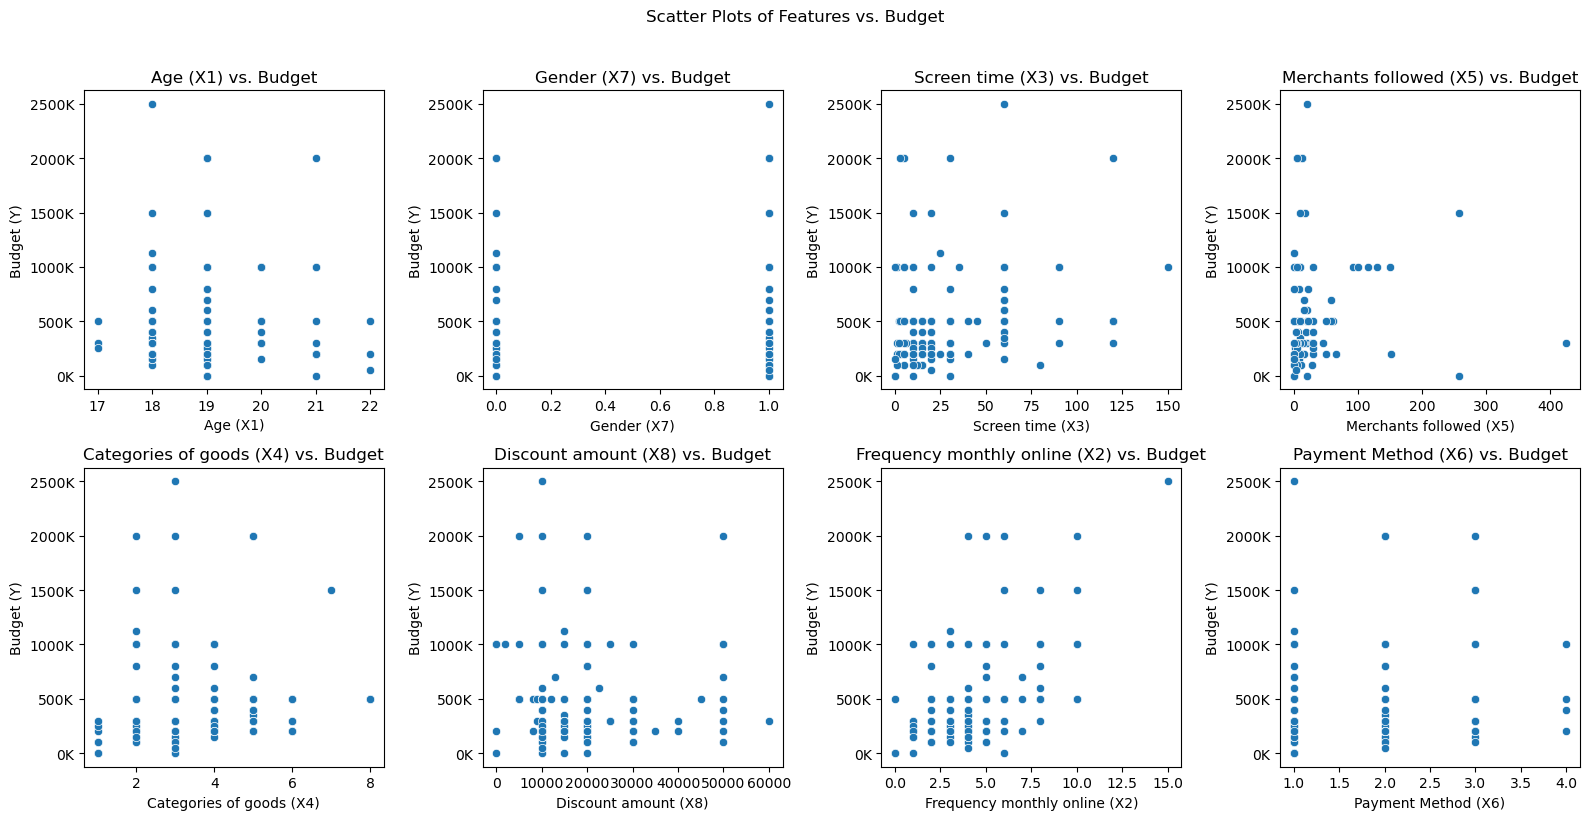

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Scatter Plots of Features vs. Budget', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through columns and create scatter plots
for i, column in enumerate(columns_to_compare):
    sns.scatterplot(x=column, y='Budget (Y)', data=df, ax=axes[i])
    axes[i].set_title(f'{column} vs. Budget')

# Format y-axis ticks in hundreds of thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### homoscedasticity

In [136]:
H = model.predict(x)
df['Estimated budget'] = H
df['Residual'] = df['Budget (Y)'] - df['Estimated budget']
df['Residual Square'] = df['Residual']**2
df

,Faculty,Domicile,Budget (Y),Gender,Age (X1),Gender (X7),Screen time (X3),Categories of goods (X4),Merchants followed (X5),Payment Method (X6),...,Frequency monthly online (X2),Frequency monthly offline,Rating of frequency offline,Rating of frequency online,Categories chosen,Payment of method chosen,frequency of promos,Estimated budget,Residual,Residual Square
0,STEM,BSD,200000,Male,19,0,40,3,3,3,...,4,15.0,medium,low,"sports, hobbies, electronics","Cash On Delivery, Virtual Account, Online Wall...",often,4.716781e+05,-2.716781e+05,7.380898e+10
1,SBE,BSD,100000,Male,18,0,5,3,0,1,...,2,10.0,high,low,"hobbies, electronics, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",always,2.850573e+05,-1.850573e+05,3.424621e+10
2,SBE,Gading Serpong,2500000,Female,18,1,60,3,20,1,...,15,7.0,medium,high,"fashion, beauty, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often,1.498092e+06,1.001908e+06,1.003819e+12
3,SBE,Jakarta,1000000,Female,19,1,60,4,30,2,...,10,2.0,medium,high,"fashion, beauty, sports, accessories","Virtual Account, Online Wallet (Shopeepay, OVO...",often,1.031540e+06,-3.154039e+04,9.947963e+08
4,SBE,Jakarta,200000,Female,19,1,30,6,13,1,...,3,10.0,medium,medium,"fashion, beauty, sports, hobbies, health, acce...","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often,3.783677e+05,-1.783677e+05,3.181504e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,SBE,BSD,300000,Female,20,1,30,2,3,2,...,3,3.0,medium,high,"fashion, beauty","Virtual Account, Online Wallet (Shopeepay, OVO...",often,3.783677e+05,-7.836770e+04,6.141496e+09
148,STEM,BSD,300000,Male,20,0,30,3,0,1,...,3,3.0,low,low,"fashion, sports, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare,3.783677e+05,-7.836770e+04,6.141496e+09
149,STEM,Gading Serpong,150000,Male,20,0,0,2,0,1,...,1,1.0,low,low,"hobbies, electronics","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",often,1.917469e+05,-4.174693e+04,1.742806e+09
150,SBE,BSD,200000,Female,21,1,30,5,66,1,...,5,5.0,medium,low,"fashion, beauty, hobbies, groceries, accessories","Online Wallet (Shopeepay, OVO, GOPAY, DANA, etc)",rare,5.649885e+05,-3.649885e+05,1.332166e+11


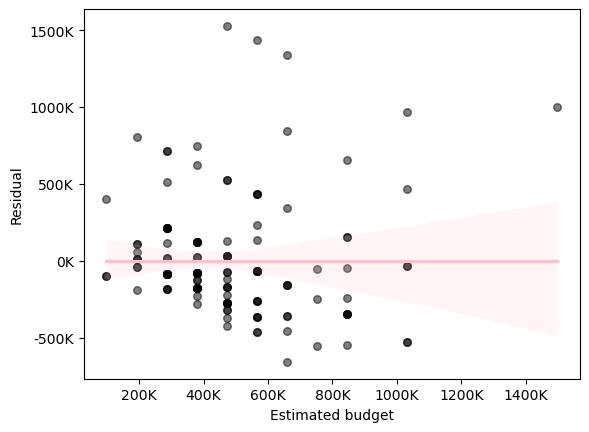

In [137]:
sns.regplot(data=df, x='Estimated budget', y='Residual',
            scatter_kws=dict(color='black', s=30, alpha=0.5),
            line_kws=dict(color="pink"))
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)
formatter = ticker.FuncFormatter(lambda y, pos: '{:.0f}K'.format(y / 1000))
plt.gca().xaxis.set_major_formatter(formatter)

### Multicolinearity

In [67]:
from statsmodels.tools.tools import add_constant
vif = df[['Age (X1)', 'Gender (X7)', 'Screen time (X3)', 'Merchants followed (X5)',
                       'Categories of goods (X4)', 'Discount amount (X8)', 'Frequency monthly online (X2)',
                       'Payment Method (X6)']]
vif = add_constant(vif)
vif_data = pd.DataFrame()
vif_data['Dependent'] = vif.columns
vif_data['VIF'] = [variance_inflation_factor(vif.values, i) for i in range (vif.shape[1])]
vif_data

,Dependent,VIF
0,const,464.348305
1,Age (X1),1.052342
2,Gender (X7),1.282662
3,Screen time (X3),1.493841
4,Merchants followed (X5),1.163237
5,Categories of goods (X4),1.188152
6,Discount amount (X8),1.043839
7,Frequency monthly online (X2),1.397230
8,Payment Method (X6),1.106138


### distribution of residual

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'norm' is not defined

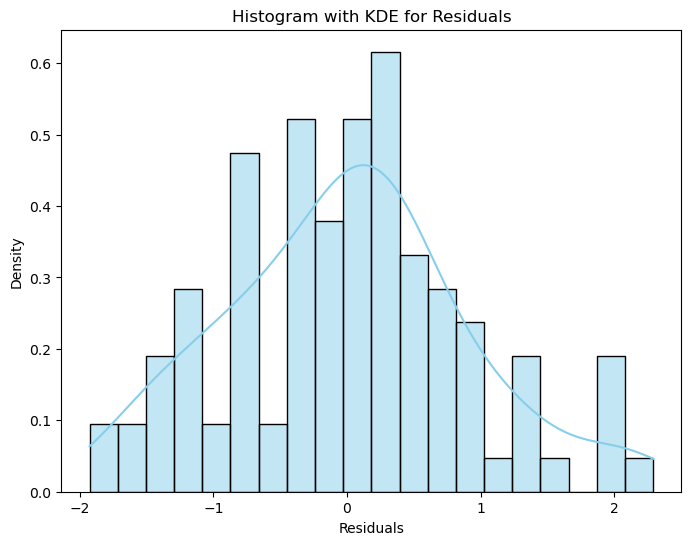

In [68]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100)

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()

# Get residuals
residuals = model.resid

# Create a histogram of residuals with a KDE line
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue', stat='density', edgecolor='black', bins=20)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram with KDE for Residuals')

# Add a line representing a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuals), np.std(residuals))
plt.plot(x, p, 'k', linewidth=2)

# Show the plot
plt.show()

### autocorrelation

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100)

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()

# Get residuals
residuals = model.resid

# Perform Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

# Display the Durbin-Watson statistic
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

# Interpret the results
if durbin_watson_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')

# STEP 4: STEP WISE REGRESSION (DATA CLEANING) 
to see if our independent variable has significance in the MLR. 

In [69]:
x_columns = ["Age (X1)", "Gender (X7)", "Screen time (X3)", "Categories of goods (X4)", "Merchants followed (X5)", "Payment Method (X6)", "Discount amount (X8)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     7.507
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.45e-08
Time:                        00:38:45   Log-Likelihood:                -2159.2
No. Observations:                 152   AIC:                             4336.
Df Residuals:                     143   BIC:                             4364.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [70]:
x_columns = ["Age (X1)", "Gender (X7)", "Screen time (X3)", "Categories of goods (X4)", "Payment Method (X6)", "Discount amount (X8)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     8.639
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.89e-09
Time:                        00:38:46   Log-Likelihood:                -2159.2
No. Observations:                 152   AIC:                             4334.
Df Residuals:                     144   BIC:                             4359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [71]:
x_columns = ["Gender (X7)", "Screen time (X3)", "Categories of goods (X4)", "Payment Method (X6)", "Discount amount (X8)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     10.15
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.34e-09
Time:                        00:38:46   Log-Likelihood:                -2159.2
No. Observations:                 152   AIC:                             4332.
Df Residuals:                     145   BIC:                             4354.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [72]:
x_columns = ["Gender (X7)", "Categories of goods (X4)", "Payment Method (X6)", "Discount amount (X8)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     12.19
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.08e-10
Time:                        00:38:46   Log-Likelihood:                -2159.4
No. Observations:                 152   AIC:                             4331.
Df Residuals:                     146   BIC:                             4349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [73]:
x_columns = ["Gender (X7)", "Categories of goods (X4)", "Payment Method (X6)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.93e-10
Time:                        00:38:46   Log-Likelihood:                -2159.5
No. Observations:                 152   AIC:                             4329.
Df Residuals:                     147   BIC:                             4344.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [74]:
x_columns = ["Gender (X7)","Payment Method (X6)", "Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.25
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           4.75e-11
Time:                        00:38:46   Log-Likelihood:                -2159.7
No. Observations:                 152   AIC:                             4327.
Df Residuals:                     148   BIC:                             4340.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [75]:
x_columns = ["Gender (X7)","Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     29.90
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.21e-11
Time:                        00:38:46   Log-Likelihood:                -2160.2
No. Observations:                 152   AIC:                             4326.
Df Residuals:                     149   BIC:                             4336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [76]:
x_columns = ["Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     57.12
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.77e-12
Time:                        00:38:46   Log-Likelihood:                -2161.3
No. Observations:                 152   AIC:                             4327.
Df Residuals:                     150   BIC:                             4333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# from the elimination process, only frequency monthly shopping has significance to the regression model


# STEP 5: DATA VISUALISATION FOR UNSIGNIFICANT X

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


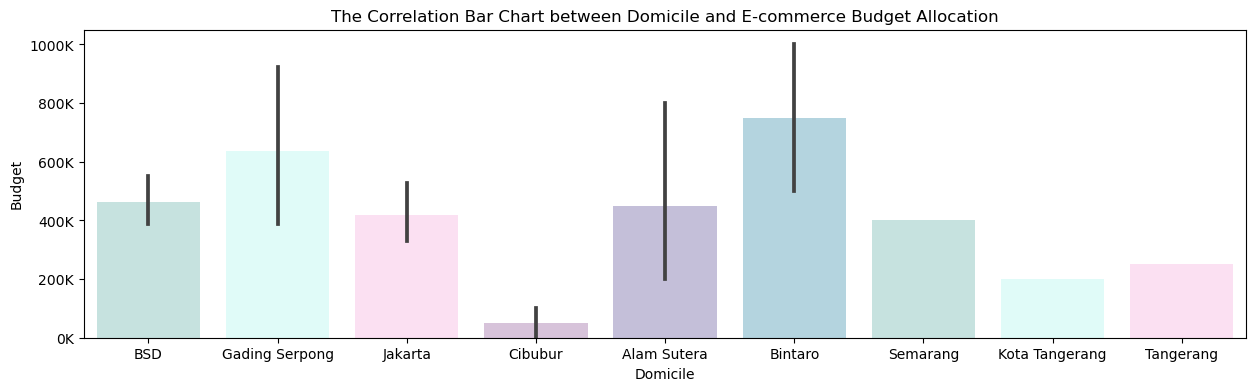

In [77]:
#Domicile
# The size
plt.figure(figsize=(15,4))

# Add title
plt.title("The Correlation Bar Chart between Domicile and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Domicile"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Domicile")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

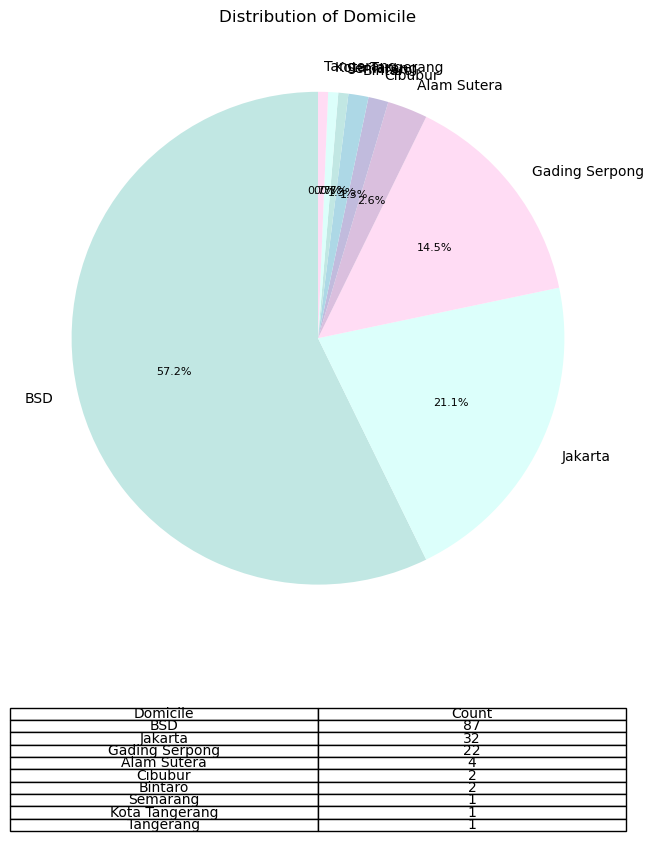

In [78]:
dom_counts = df['Domicile'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(dom_counts, labels=dom_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])


table_data = [(str(label), str(dom_counts[label])) for label in dom_counts.index]
table = plt.table(cellText=table_data, colLabels=['Domicile', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Domicile')
plt.show()

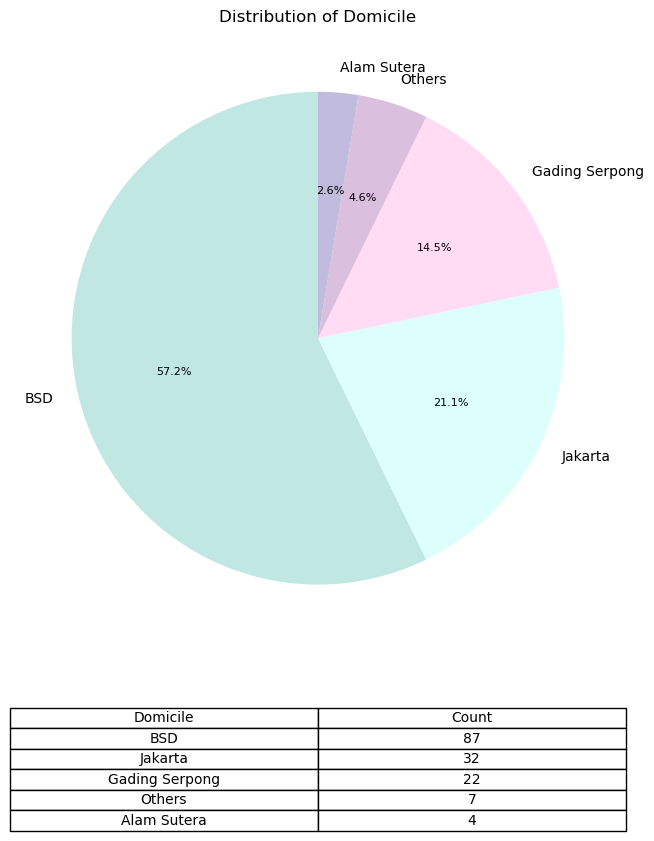

In [79]:
top_locations = df['Domicile'].value_counts().nlargest(4).index
df['Domicile'] = df['Domicile'].where(df['Domicile'].isin(top_locations), 'Others')

# Count the occurrences of each category
df_counts = df['Domicile'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd", "#ADD8E6"])

# Add a table
table_data = [(str(label), str(df_counts[label])) for label in df_counts.index]
table = plt.table(cellText=table_data, colLabels=['Domicile', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

# Customize text sizes
plt.setp(autotexts, size=8)
plt.setp(texts, size=10)

# Add title
plt.title('Distribution of Domicile')

# Show the plot
plt.show()

# from these visualisation, we can conclude that even tho majority of the respondents are from BSD, the highest budget is from Bintaro

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


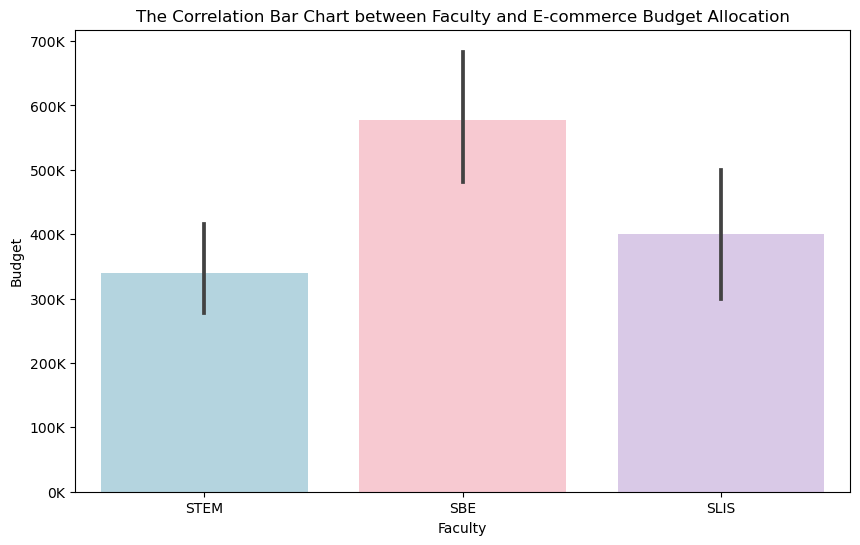

In [80]:
# Faculty
# The size
plt.figure(figsize=(10,6))

# Add title
plt.title("The Correlation Bar Chart between Faculty and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Faculty"], y=df['Budget (Y)'], palette=["#add8e6","#ffc1cc","#d9c4ec"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Faculty")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

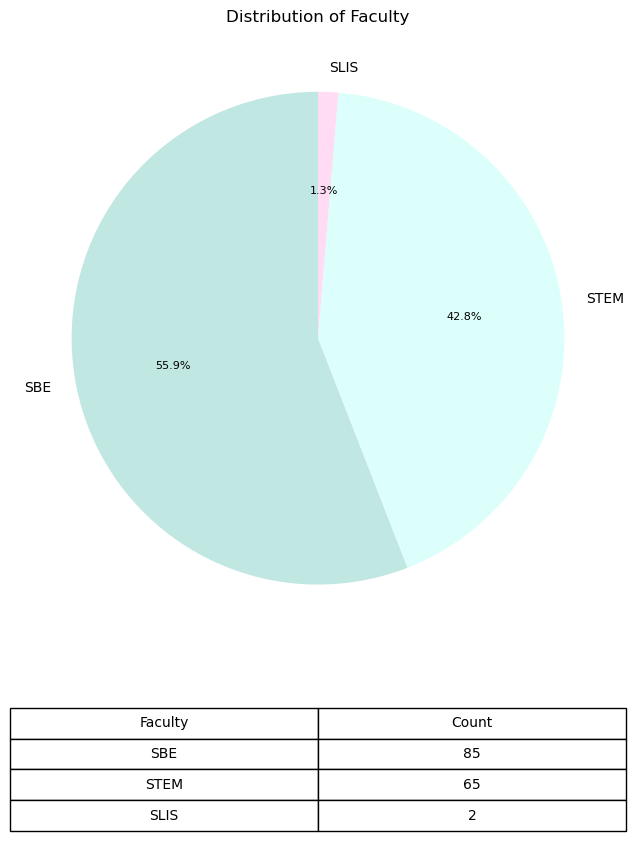

In [81]:
fac_counts = df['Faculty'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(fac_counts, labels=fac_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])


table_data = [(str(label), str(fac_counts[label])) for label in fac_counts.index]
table = plt.table(cellText=table_data, colLabels=['Faculty', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Faculty')
plt.show()

# from these visualisations we can see that SBE has the higer budget and what is unique is that even though there are only two SLIS respondent, they have a higher budget than the entirerity of STEM respondents!

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


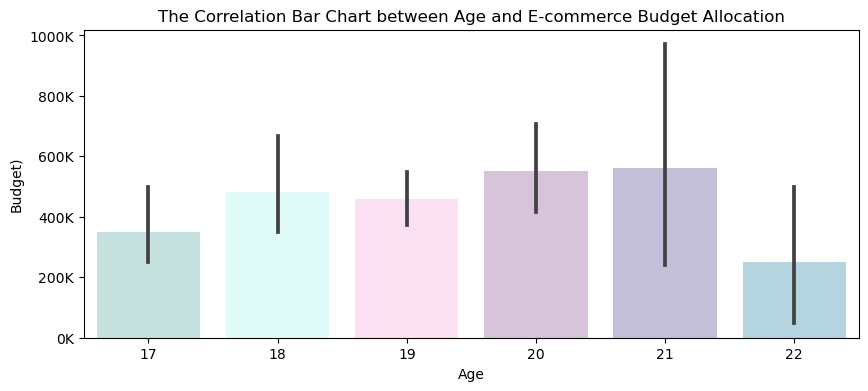

In [82]:
#Age
# The size
plt.figure(figsize=(10,4))

# Add title
plt.title("The Correlation Bar Chart between Age and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Age (X1)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget)")
plt.xlabel("Age")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

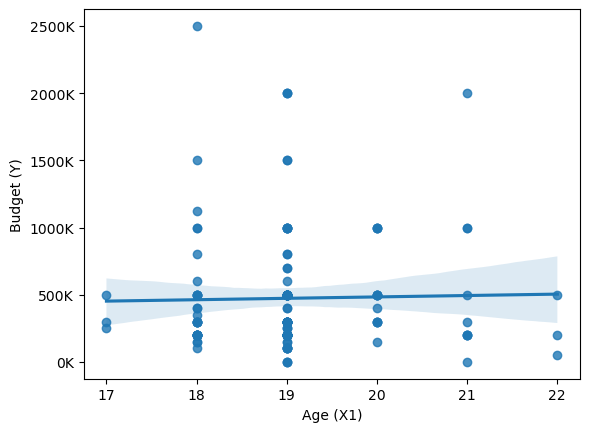

In [83]:
sns.regplot(x=df['Age (X1)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

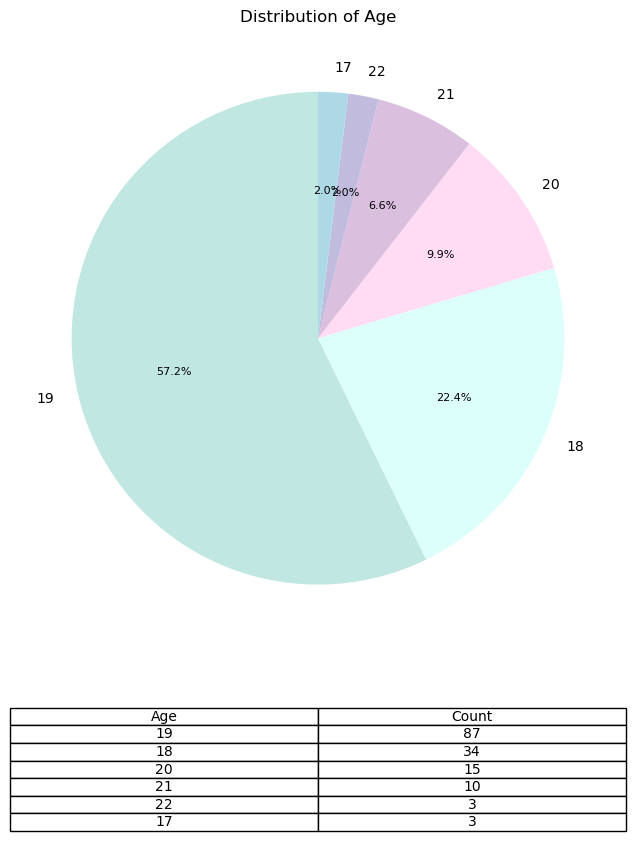

In [84]:
age_counts = df['Age (X1)'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])


table_data = [(str(label), str(age_counts[label])) for label in age_counts.index]
table = plt.table(cellText=table_data, colLabels=['Age', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Age')
plt.show()

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


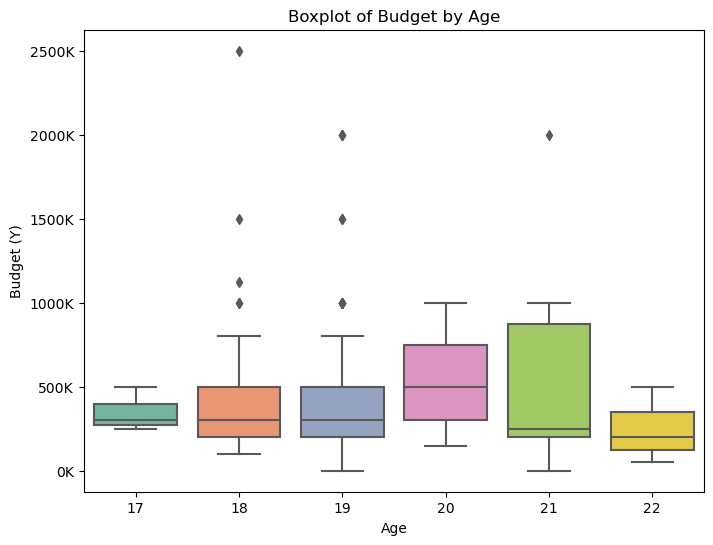

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age (X1)', y='Budget (Y)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by Age')

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

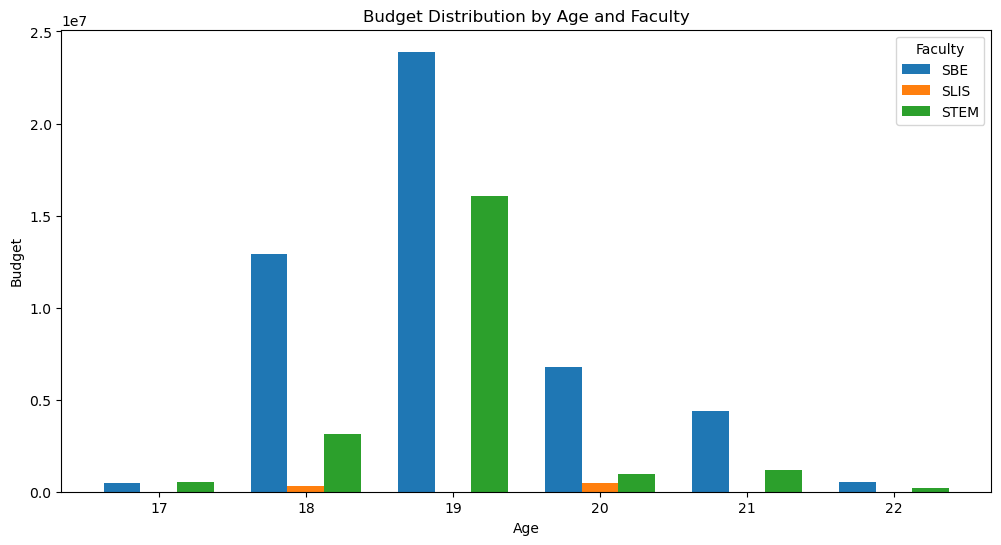

In [86]:
grouped_data = df.groupby(['Age (X1)', 'Faculty'])['Budget (Y)'].sum().unstack(fill_value=0)

bar_width = 0.25
index = np.arange(len(grouped_data.index))
faculties = grouped_data.columns

plt.figure(figsize=(12, 6))

for i, faculty in enumerate(faculties):
    plt.bar(index + i * bar_width, grouped_data[faculty], width=bar_width, label=faculty)

plt.xlabel('Age')
plt.ylabel('Budget')
plt.title('Budget Distribution by Age and Faculty')
plt.xticks(index + bar_width * (len(faculties) - 1) / 2, grouped_data.index)
plt.legend(title='Faculty')

plt.show()

# from these visualisation, we can see that 21 has the highest budgets compared to the other ages , however, as you can see from the regression plot, it is a straightline, showing us that the age has no correlation towards the budgets of the students because as you can see, the students at the age of 22 has a lower budgets than students of ages 18, 19, and 20. this means that due to our small range, the budgets for students are relatively the same as they are in the same sociogroup. 

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


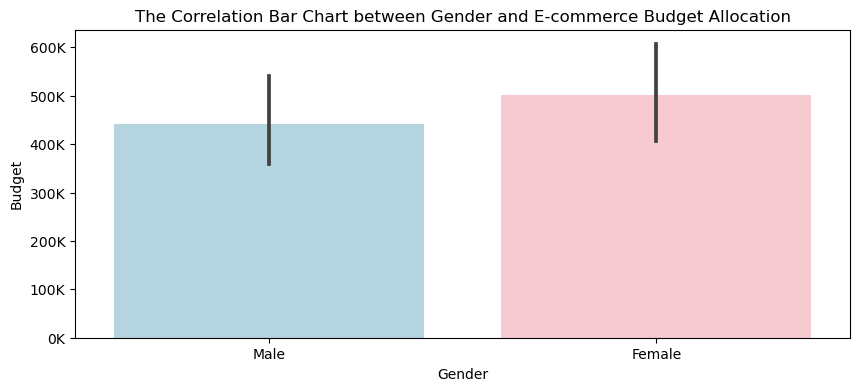

In [87]:
# Gender
# The size
plt.figure(figsize=(10,4))

# Add title
plt.title("The Correlation Bar Chart between Gender and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Gender"], y=df['Budget (Y)'], palette=["#add8e6","#ffc1cc"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Gender")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

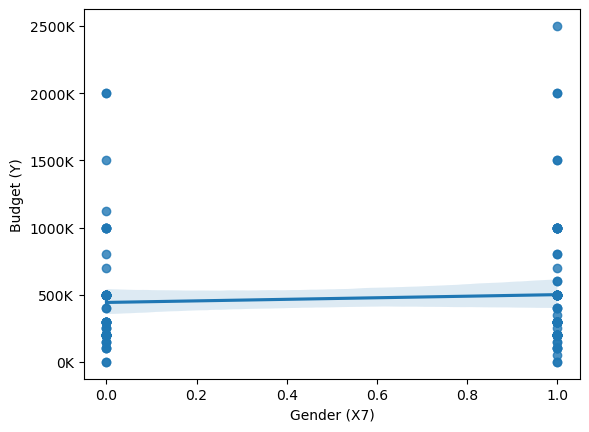

In [89]:
sns.regplot(x=df['Gender (X7)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

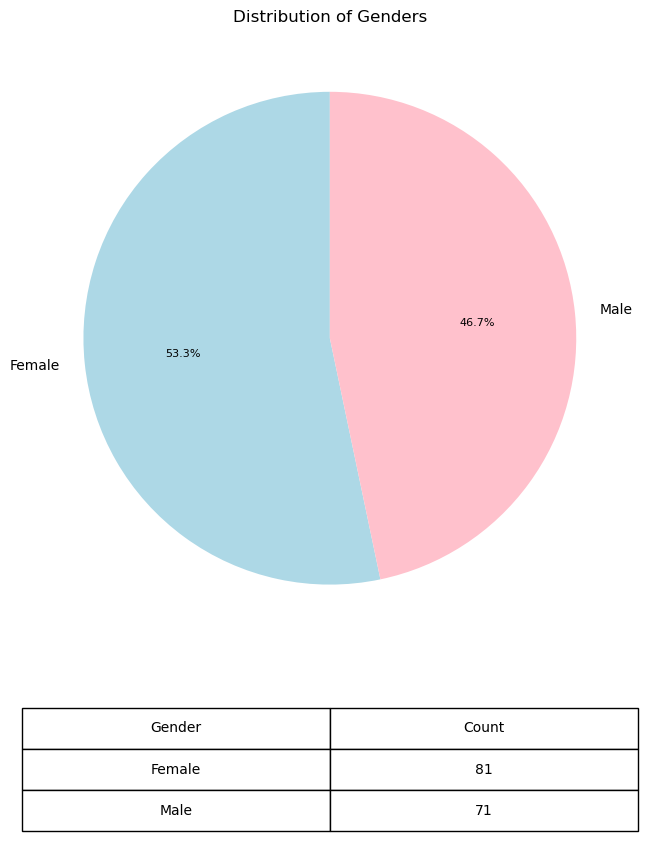

In [90]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["#add8e6","#ffc1cc"])

table_data = [(str(label), str(gender_counts[label])) for label in gender_counts.index]
table = plt.table(cellText=table_data, colLabels=['Gender', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Genders')
plt.show()

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


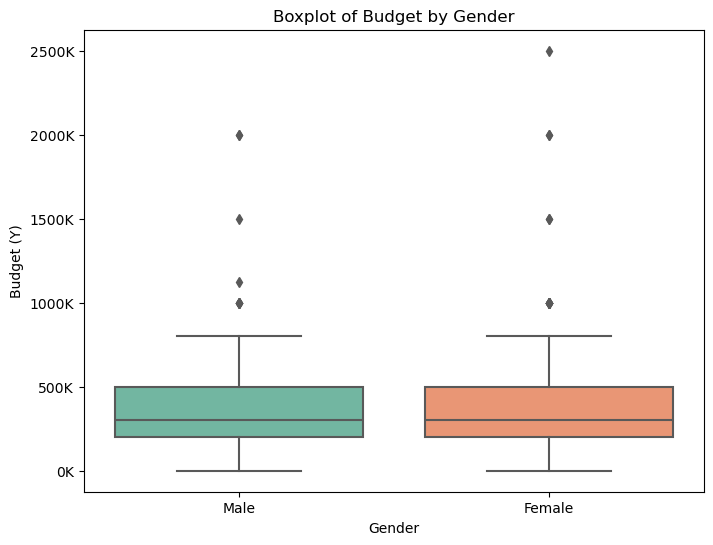

In [140]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Budget (Y)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by Gender')

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# from all of these visualisation, we can tell that the females tend to have a higher budget than males.

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


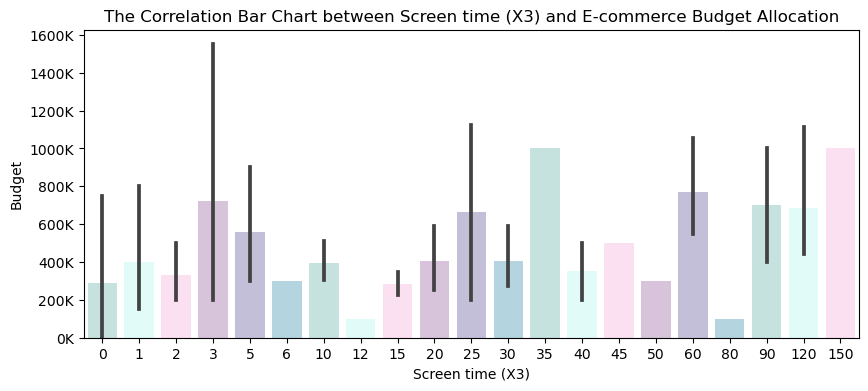

In [92]:
# Screen time (X3)

# The size
plt.figure(figsize=(10,4))

# Add title
plt.title("The Correlation Bar Chart between Screen time (X3) and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Screen time (X3)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Screen time (X3)")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

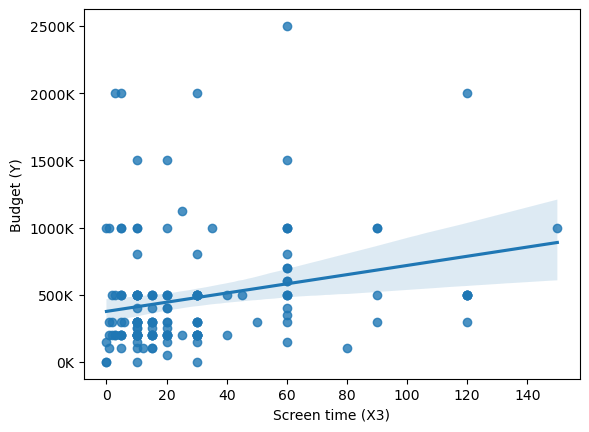

In [93]:
sns.regplot(x=df['Screen time (X3)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


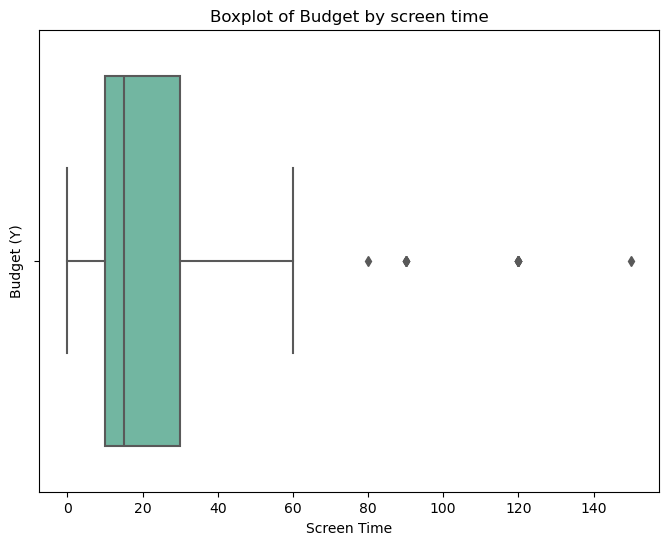

In [94]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Screen time (X3)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Screen Time')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by screen time')

# Show the plot
plt.show()

# from these visualisation we can see that the budgets tend to have a unique relationship because the mean budget per screen time changes depends on the amount and it doesnt necessarily mean those changes are always positive or always negative, the graphs are going up and down. however, this still has a positive correlation towards their budget albeit the ups and downs

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


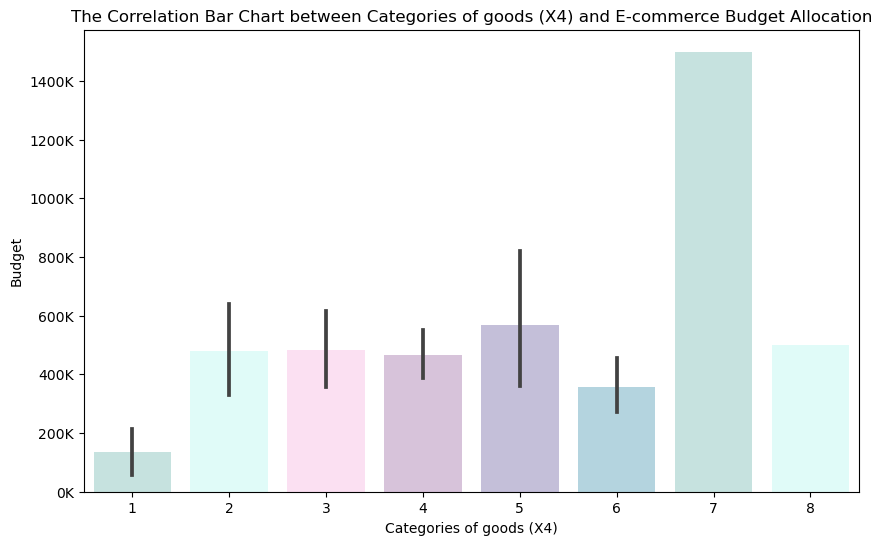

In [95]:
#Categories of goods (X4)

# The size
plt.figure(figsize=(10,6))

# Add title
plt.title("The Correlation Bar Chart between Categories of goods (X4) and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Categories of goods (X4)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])
# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Categories of goods (X4)")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

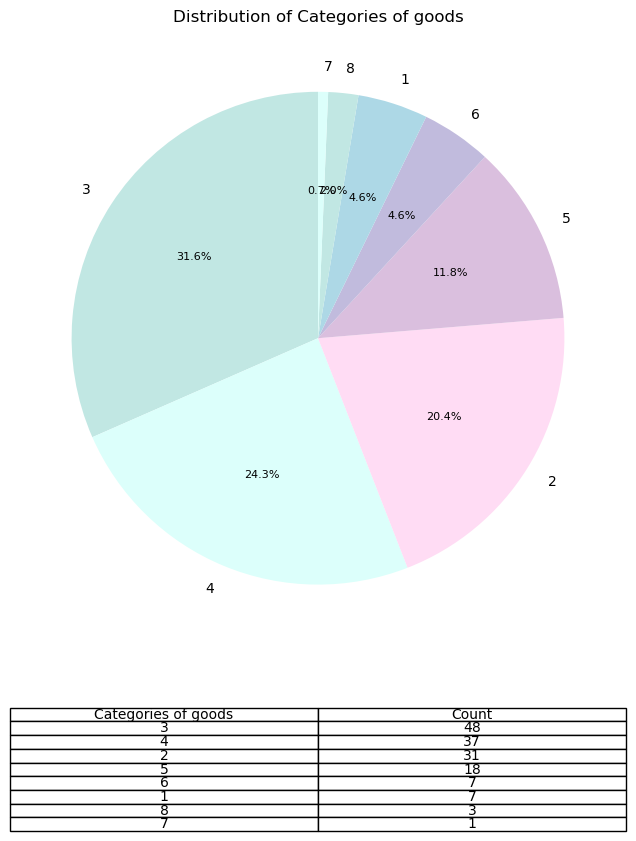

In [96]:
cog_counts = df['Categories of goods (X4)'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(cog_counts, labels=cog_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])
table_data = [(str(label), str(cog_counts[label])) for label in cog_counts.index]
table = plt.table(cellText=table_data, colLabels=['Categories of goods', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Categories of goods')
plt.show()

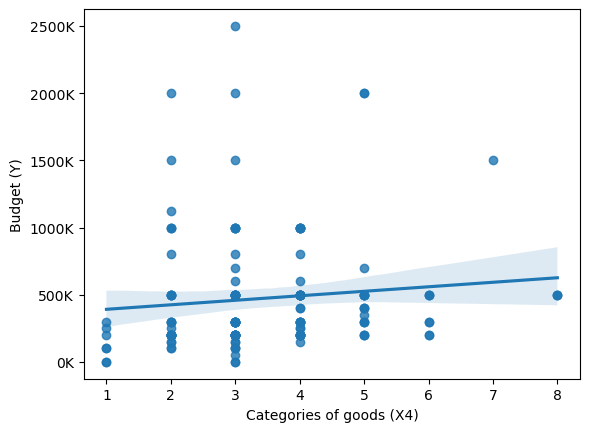

In [97]:
sns.regplot(x=df['Categories of goods (X4)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


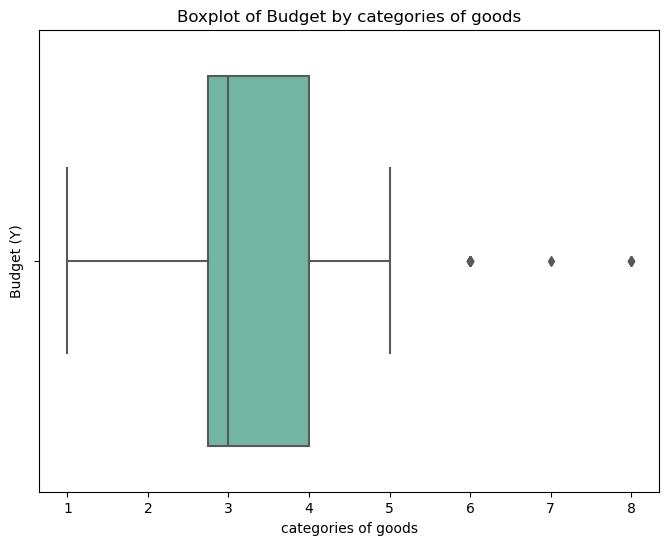

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categories of goods (X4)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('categories of goods')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by categories of goods')

# Show the plot
plt.show()

# this independent variable does have a positive impact towards students budget, however it is not that strong because as the categories increases, the budget does increase also, but it significantly dropped at the end.

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


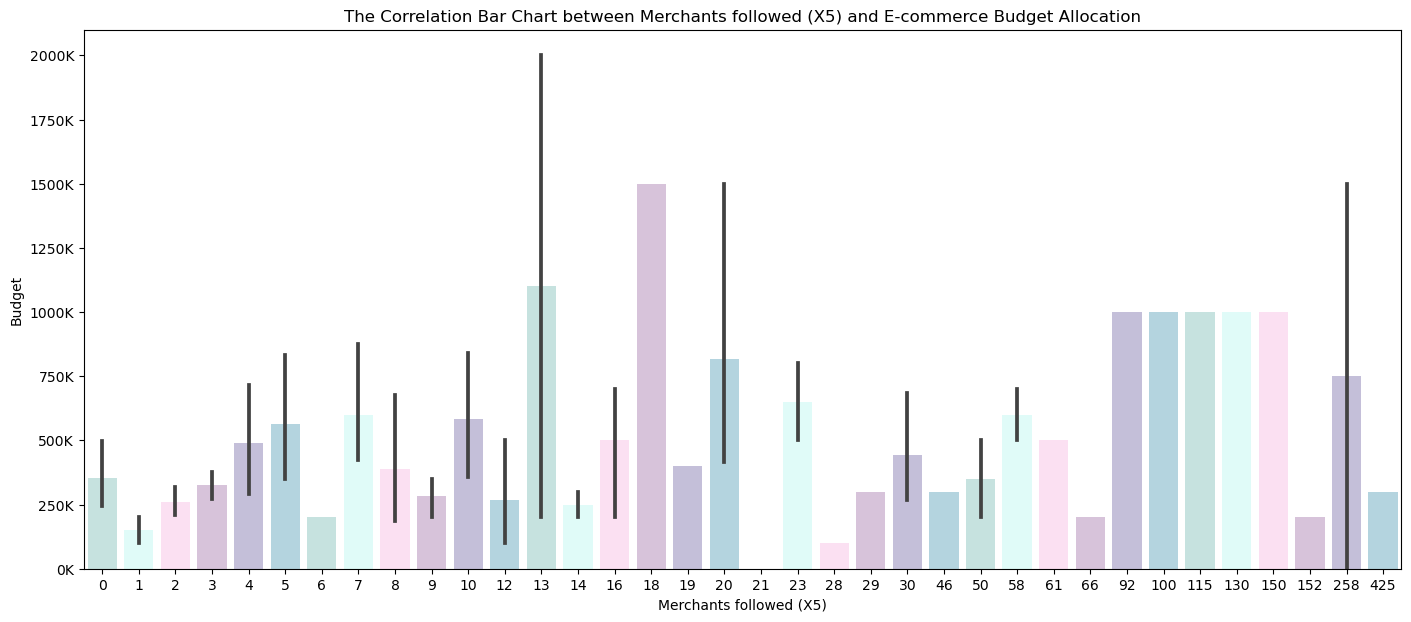

In [100]:
#Merchants followed (X5)

# The size
plt.figure(figsize=(17,7))

# Add title
plt.title("The Correlation Bar Chart between Merchants followed (X5) and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Merchants followed (X5)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Merchants followed (X5)")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

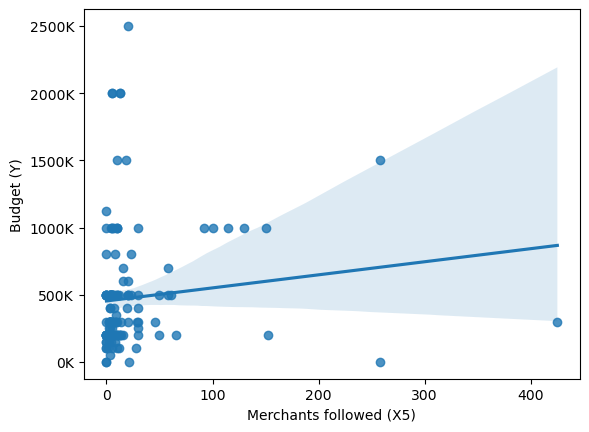

In [101]:
sns.regplot(x=df['Merchants followed (X5)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


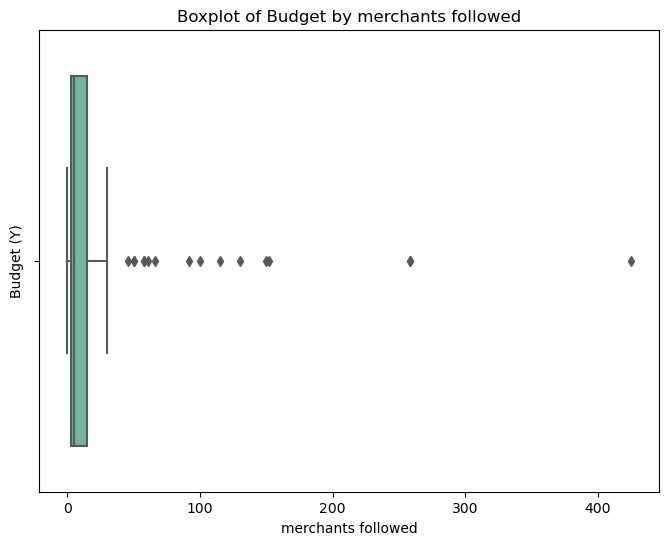

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Merchants followed (X5)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('merchants followed')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by merchants followed')

# Show the plot
plt.show()

# due to the fact that it has a lot of value in this independent variable, visualisizing this data will be hard, especially data correlating with lines as it is too broad of a range, with a narrow grouping of numbers. because of this the only visualisation fitting for this is barplot. however, from the regression plot, we can see that is has a slight postive effect towards the budget

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


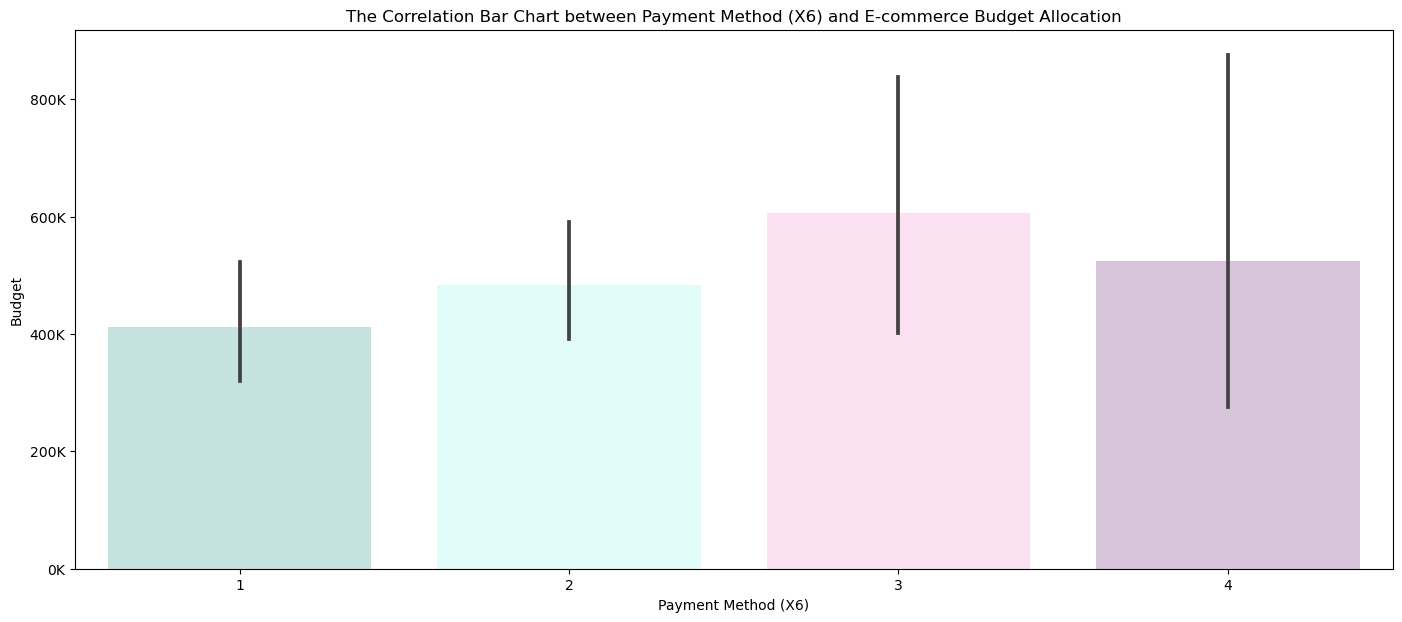

In [103]:
#Payment Method (X6)

# The size
plt.figure(figsize=(17,7))

# Add title
plt.title("The Correlation Bar Chart between Payment Method (X6) and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Payment Method (X6)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Payment Method (X6)")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

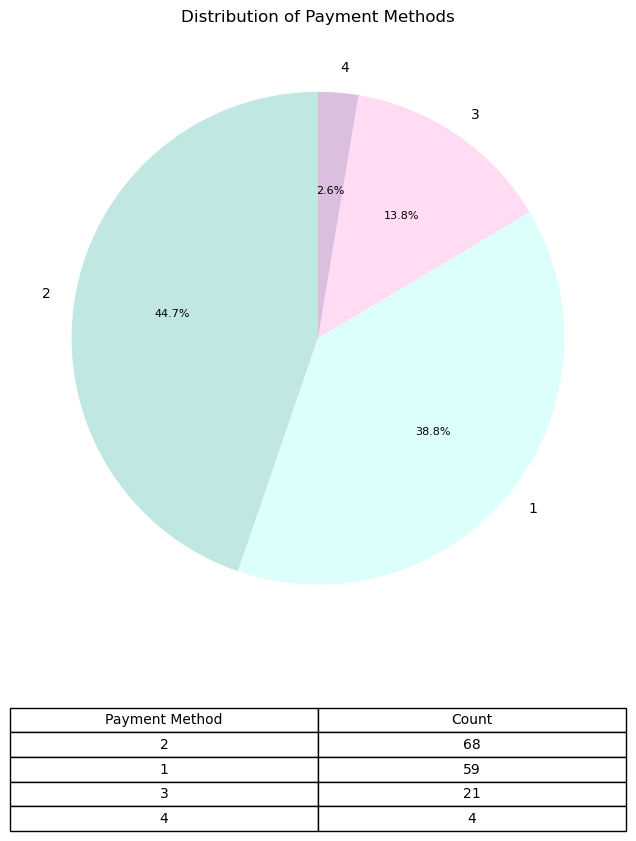

In [104]:
pm_counts = df['Payment Method (X6)'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(pm_counts, labels=pm_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])
table_data = [(str(label), str(pm_counts[label])) for label in pm_counts.index]
table = plt.table(cellText=table_data, colLabels=['Payment Method', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of Payment Methods')
plt.show()

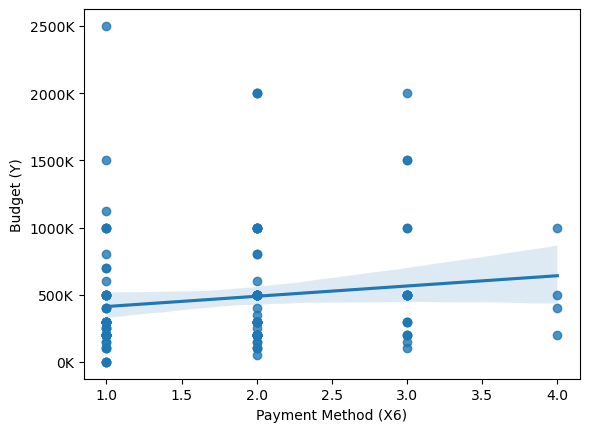

In [105]:
sns.regplot(x=df['Payment Method (X6)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


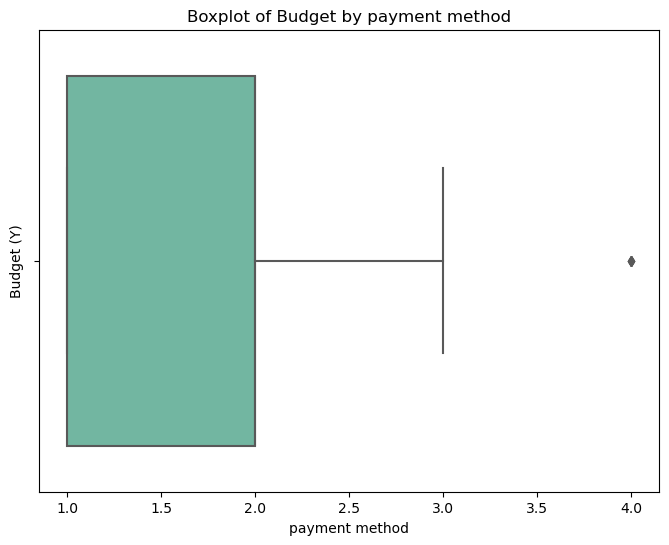

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Payment Method (X6)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('payment method')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by payment method')

# Show the plot
plt.show()

# based on these visualisations, we can see that the budget gradually increases as the payment method increases, however because it decreases during "4" this will not have a strong correlation with the budget, thus resulting in a steeper regression plot

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


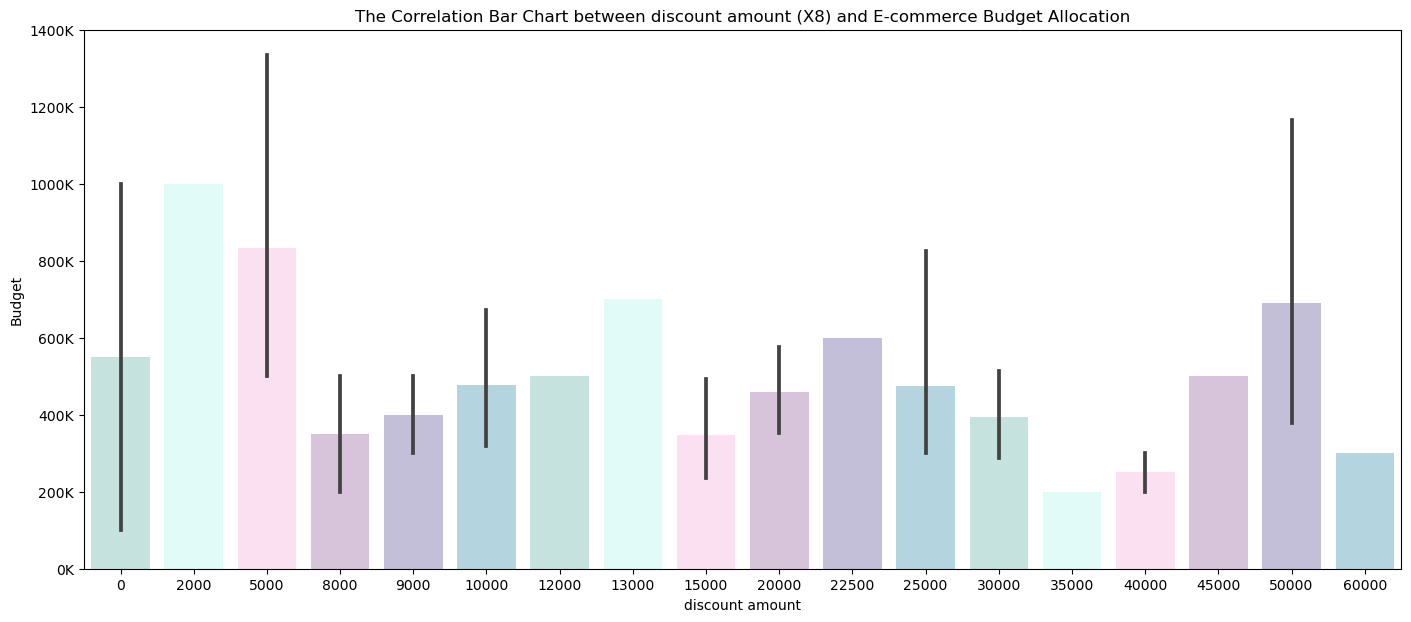

In [107]:
#discount amount (X8)

# The size
plt.figure(figsize=(17,7))

# Add title
plt.title("The Correlation Bar Chart between discount amount (X8) and E-commerce Budget Allocation")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df["Discount amount (X8)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("discount amount")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


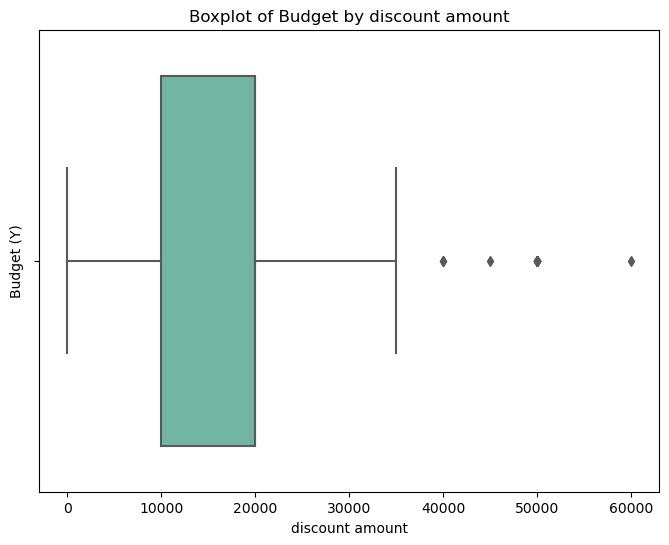

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Discount amount (X8)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('discount amount')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by discount amount')

# Show the plot
plt.show()

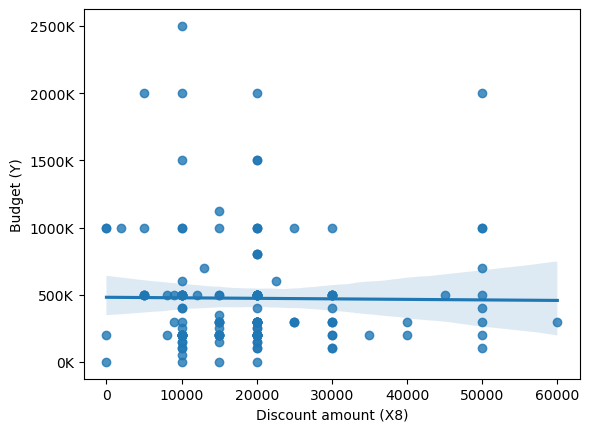

In [109]:
sns.regplot(x=df['Discount amount (X8)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

## STEP 6: DELETING THE UNSIGNIFICANT INDEPENDENT VARIABLE

In [110]:
del df["Gender (X7)"]
del df["Gender"]
del df["Age (X1)"]
del df["Screen time (X3)"]
del df["Categories of goods (X4)"]
del df["Merchants followed (X5)"]
del df["Discount amount (X8)"]
del df["Frequency monthly offline"]
del df["Rating of frequency online"]
del df["Categories chosen"]
del df["Payment of method chosen"]
del df["frequency of promos"]
del df["Payment Method (X6)"]
del df["Rating of frequency offline"]

df

,Faculty,Domicile,Budget (Y),Frequency monthly online (X2)
0,STEM,BSD,200000,4
1,SBE,BSD,100000,2
2,SBE,Gading Serpong,2500000,15
3,SBE,Jakarta,1000000,10
4,SBE,Jakarta,200000,3
...,...,...,...,...
147,SBE,BSD,300000,3
148,STEM,BSD,300000,3
149,STEM,Gading Serpong,150000,1
150,SBE,BSD,200000,5


#  STEP 7: DATA VISUALISATION FOR SIGNIFICANT X

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


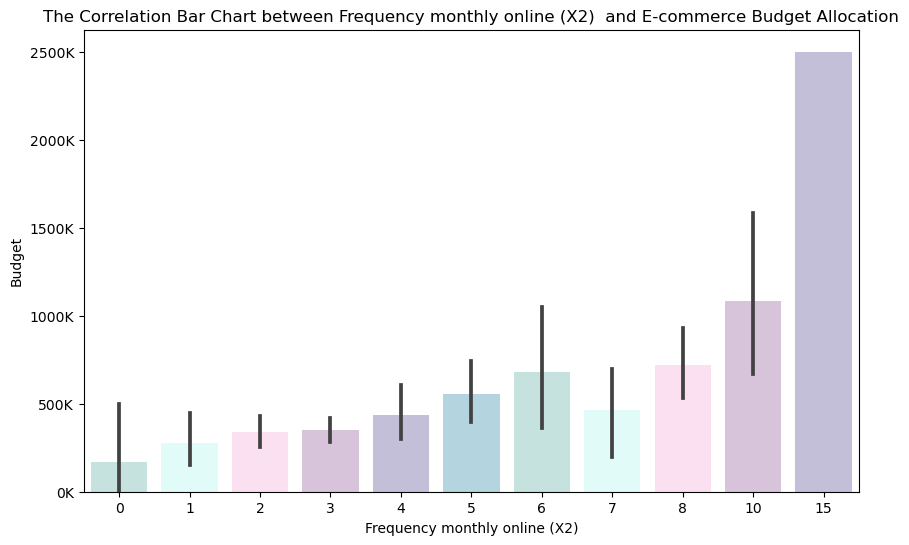

In [111]:
# Frequency monthly online (X2) 
import matplotlib.ticker as ticker
# The size
plt.figure(figsize=(10,6))

# Add title
plt.title("The Correlation Bar Chart between Frequency monthly online (X2)  and E-commerce Budget Allocation")


sns.barplot(x=df["Frequency monthly online (X2)"], y=df['Budget (Y)'], palette=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])

# Add label for vertical axis
plt.ylabel("Budget")
plt.xlabel("Frequency monthly online (X2)")

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

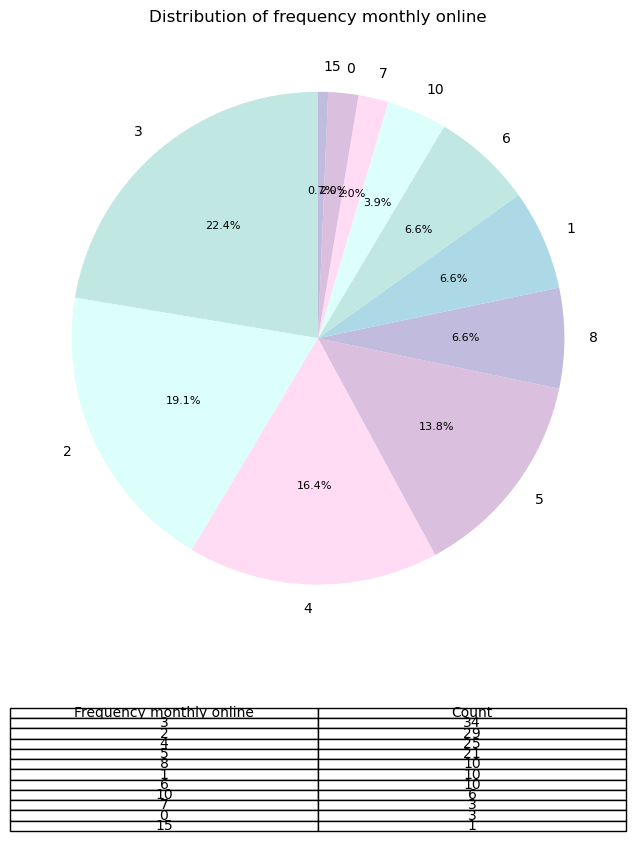

In [112]:
fmo_counts = df['Frequency monthly online (X2)'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(fmo_counts, labels=fmo_counts.index, autopct='%1.1f%%', startangle=90, colors=["#c1e7e3", "#dcfffb", "#ffdcf4", "#dabfde", "#c1bbdd","#ADD8E6"])
table_data = [(str(label), str(fmo_counts[label])) for label in fmo_counts.index]
table = plt.table(cellText=table_data, colLabels=['Frequency monthly online', 'Count'], cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

plt.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.setp(autotexts, size=8) 
plt.setp(texts, size=10)

plt.title('Distribution of frequency monthly online')
plt.show()

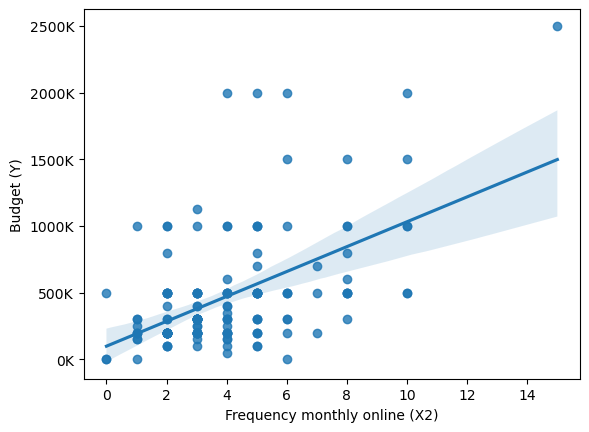

In [113]:
sns.regplot(x=df['Frequency monthly online (X2)'], y=df['Budget (Y)'])
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

C:\Users\kezia\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


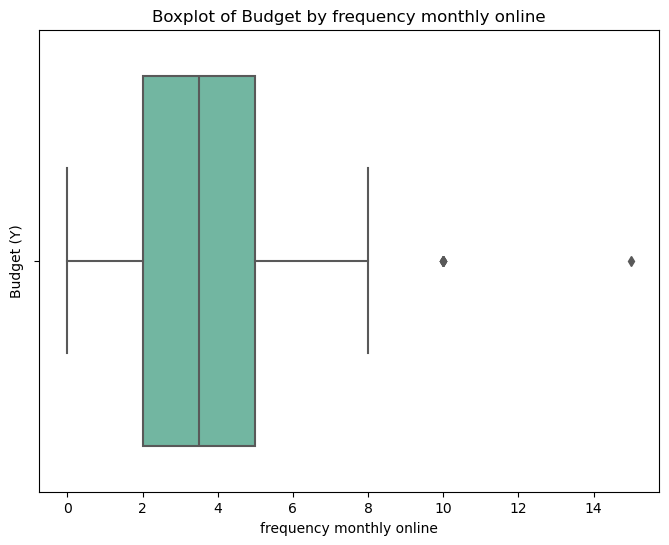

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frequency monthly online (X2)', data=df, palette='Set2')

# Add labels and title
plt.xlabel('frequency monthly online')
plt.ylabel('Budget (Y)')
plt.title('Boxplot of Budget by frequency monthly online')

# Show the plot
plt.show()

# this is visual proof why this independent variable is significant for our analysis. first, we can see that its regression plot has an incline due to its strong positive correlation towards the budget. aside from that to show the strong correlation, we can see that in the average graph, the budget increases the more a student often purchase something online in a month.

## STEP 8: CREATING AND FITTING A REGESSION MODEL
because the only significant x is only one, we will be conducting a simple linear regression

In [115]:
x = df[["Frequency monthly online (X2)"]]
y = df[['Budget (Y)']]

In [116]:
LR = LinearRegression()
model = LR.fit(x,y)

## COEFFICIENT DETERMINATION - $R^2$

In [117]:
R_squared = model.score(x,y)
rounded_number = round(R_squared, 2)
print('the coefficient of determination in this model is:', rounded_number)

the coefficient of determination in this model is: 0.28


# Intercept - $b_0$

In [118]:
print('intercept:', model.intercept_)

intercept: [98436.5461575]


# Slope - $b_1$

In [119]:
print("Slope:", model.coef_[0][0])

Slope: 93310.38458929663


# Analysis : $\hat{y}$ = 98436.55+ 93310.38$x_1$ 

# STEP 9: PREDICTED RESPONSE

In [120]:
H = model.predict(x)
df['Estimated budget'] = H
df

,Faculty,Domicile,Budget (Y),Frequency monthly online (X2),Estimated budget
0,STEM,BSD,200000,4,4.716781e+05
1,SBE,BSD,100000,2,2.850573e+05
2,SBE,Gading Serpong,2500000,15,1.498092e+06
3,SBE,Jakarta,1000000,10,1.031540e+06
4,SBE,Jakarta,200000,3,3.783677e+05
...,...,...,...,...,...
147,SBE,BSD,300000,3,3.783677e+05
148,STEM,BSD,300000,3,3.783677e+05
149,STEM,Gading Serpong,150000,1,1.917469e+05
150,SBE,BSD,200000,5,5.649885e+05


In [121]:
df['Residual'] = df['Budget (Y)'] - df['Estimated budget']
df

,Faculty,Domicile,Budget (Y),Frequency monthly online (X2),Estimated budget,Residual
0,STEM,BSD,200000,4,4.716781e+05,-2.716781e+05
1,SBE,BSD,100000,2,2.850573e+05,-1.850573e+05
2,SBE,Gading Serpong,2500000,15,1.498092e+06,1.001908e+06
3,SBE,Jakarta,1000000,10,1.031540e+06,-3.154039e+04
4,SBE,Jakarta,200000,3,3.783677e+05,-1.783677e+05
...,...,...,...,...,...,...
147,SBE,BSD,300000,3,3.783677e+05,-7.836770e+04
148,STEM,BSD,300000,3,3.783677e+05,-7.836770e+04
149,STEM,Gading Serpong,150000,1,1.917469e+05,-4.174693e+04
150,SBE,BSD,200000,5,5.649885e+05,-3.649885e+05


In [122]:
df['Residual Square'] = df['Residual']**2
df

,Faculty,Domicile,Budget (Y),Frequency monthly online (X2),Estimated budget,Residual,Residual Square
0,STEM,BSD,200000,4,4.716781e+05,-2.716781e+05,7.380898e+10
1,SBE,BSD,100000,2,2.850573e+05,-1.850573e+05,3.424621e+10
2,SBE,Gading Serpong,2500000,15,1.498092e+06,1.001908e+06,1.003819e+12
3,SBE,Jakarta,1000000,10,1.031540e+06,-3.154039e+04,9.947963e+08
4,SBE,Jakarta,200000,3,3.783677e+05,-1.783677e+05,3.181504e+10
...,...,...,...,...,...,...,...
147,SBE,BSD,300000,3,3.783677e+05,-7.836770e+04,6.141496e+09
148,STEM,BSD,300000,3,3.783677e+05,-7.836770e+04,6.141496e+09
149,STEM,Gading Serpong,150000,1,1.917469e+05,-4.174693e+04,1.742806e+09
150,SBE,BSD,200000,5,5.649885e+05,-3.649885e+05,1.332166e+11


In [123]:
total = df['Residual Square'].sum()
import math
error = math.sqrt(total/146)
print("the multiple standard error of estimate is: ", error)

the multiple standard error of estimate is:  369755.5351611552


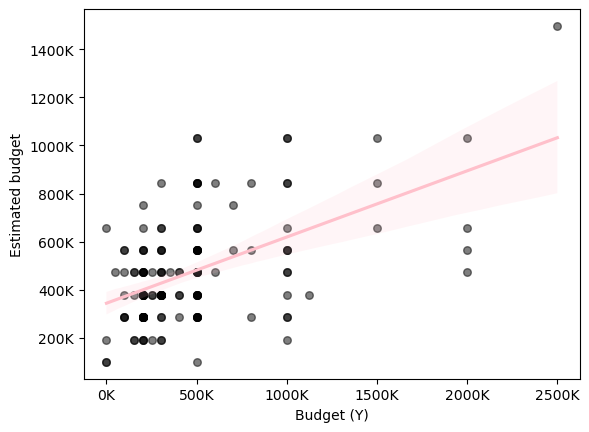

In [124]:
sns.regplot(data=df, x='Budget (Y)', y='Estimated budget',
            scatter_kws=dict(color='black', s=30, alpha=0.5),
            line_kws=dict(color="pink"))
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)
formatter = ticker.FuncFormatter(lambda y, pos: '{:.0f}K'.format(y / 1000))
plt.gca().xaxis.set_major_formatter(formatter)

## a regression plot comparing the expected vs actual budget of students in prasetiya mulya.

# STEP 10: OLS SUMMARY

In [125]:
x_columns = ["Frequency monthly online (X2)"]
y = df['Budget (Y)']

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    print(results.summary())

get_stats()

                            OLS Regression Results                            
Dep. Variable:             Budget (Y)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     57.12
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.77e-12
Time:                        00:40:23   Log-Likelihood:                -2161.3
No. Observations:                 152   AIC:                             4327.
Df Residuals:                     150   BIC:                             4333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### From this summary, we can conclude that from the adjusted r square the independent variable does not really explain the variance in the dependent variable because its value is 0.271. aside from that, we can see here that the x (frequency monthly shopping online) is significant towards the y because the value of p>|t| is less than 0.05.